# Female Tumor (M2) Preprocessing


In [1]:
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb

In [2]:
# !pip install phate

## Read in Files

In [2]:
indir = "../data/M2/"
sample = 'gex_possorted_bam_1WGCZ'

adata = mb.pp.read_loom(sample, indir)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Doublet detection

Given a raw (unnormalized) UMI counts matrix counts_matrix with cells as rows and genes as columns, calculate a doublet score for each cell:

```import scrublet as scr
scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
scr.scrub_doublets() simulates doublets from the observed data and uses a k-nearest-neighbor classifier to calculate a continuous doublet_score (between 0 and 1) for each transcriptome. The score is automatically thresholded to generate predicted_doublets, a boolean array that is True for predicted doublets and False otherwise.
```
Best practices:
- When working with data from multiple samples, run Scrublet on each sample separately. Because Scrublet is designed to detect technical doublets formed by the random co-encapsulation of two cells, it may perform poorly on merged datasets where the cell type proportions are not representative of any single sample.
- Check that the doublet score threshold is reasonable (in an ideal case, separating the two peaks of a bimodal simulated doublet score histogram, as in this example), and adjust manually if necessary.
- Visualize the doublet predictions in a 2-D embedding (e.g., UMAP or t-SNE). Predicted doublets should mostly co-localize (possibly in multiple clusters). If they do not, you may need to adjust the doublet score threshold, or change the pre-processing parameters to better resolve the cell states present in your data.


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 35.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.4%
Elapsed time: 5.6 seconds
Running UMAP...
Done.


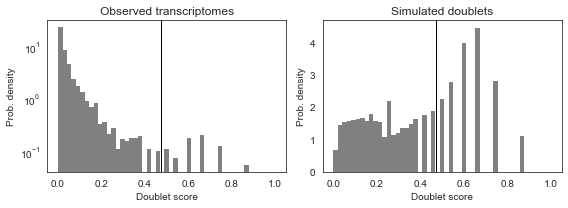

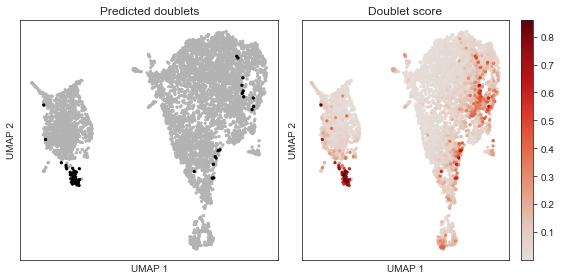

In [7]:
mb.pp.doublet_detections(adata, layer = 'matrix', plot = True, log_transform = True)

In [8]:
(adata.obs.predicted_doublets == True).sum()

82

## Filter and concatenate

In [9]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM', 'TMED11','RSL24D1','OLFR123','ADAM20']


In [10]:
adata

AnnData object with n_obs × n_vars = 5207 × 32285
    obs: 'doublet_scores', 'predicted_doublets'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [11]:
adata_raw = adata.copy()

## Filter and Normalize with Scanpy
This does a log transformation on the normalized data

In [14]:
mb.pp.scanpy_recipe(adata,retain_genes=[i.capitalize() for i in tfs], min_genes = 100, min_cells = 3)

Filtered out 16521 genes that are detected in less than 3 cells (spliced).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


AnnData object with n_obs × n_vars = 5165 × 15764
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [15]:
adata_raw

AnnData object with n_obs × n_vars = 5207 × 32285
    obs: 'doublet_scores', 'predicted_doublets'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [14]:
# adata_raw.write_csvs('../../out/RPM-time-series/RPM_raw', skip_data=False)

writing .csv files to ../../out/RPM-time-series/RPM_raw


In [16]:
adata

AnnData object with n_obs × n_vars = 5165 × 15764
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [17]:
adata.write_h5ad('../data/M2/adata_01.h5ad')

## PCA and UMAP

In [3]:
adata = sc.read_h5ad('../data/M2/adata_01.h5ad')

In [4]:
sc.tl.pca(adata, n_comps=50, use_highly_variable=False)
scv.pp.neighbors(adata, random_state=0)
scv.tl.umap(adata, random_state=0)

computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


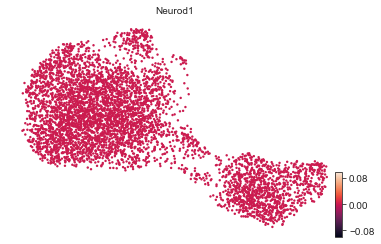

In [5]:
scv.pl.umap(adata, color = 'Neurod1', smooth = True)

In [6]:
adata

AnnData object with n_obs × n_vars = 5165 × 15764
    obs: 'doublet_scores', 'predicted_doublets', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

saving figure to file ./figures/scvelo_doublets.png


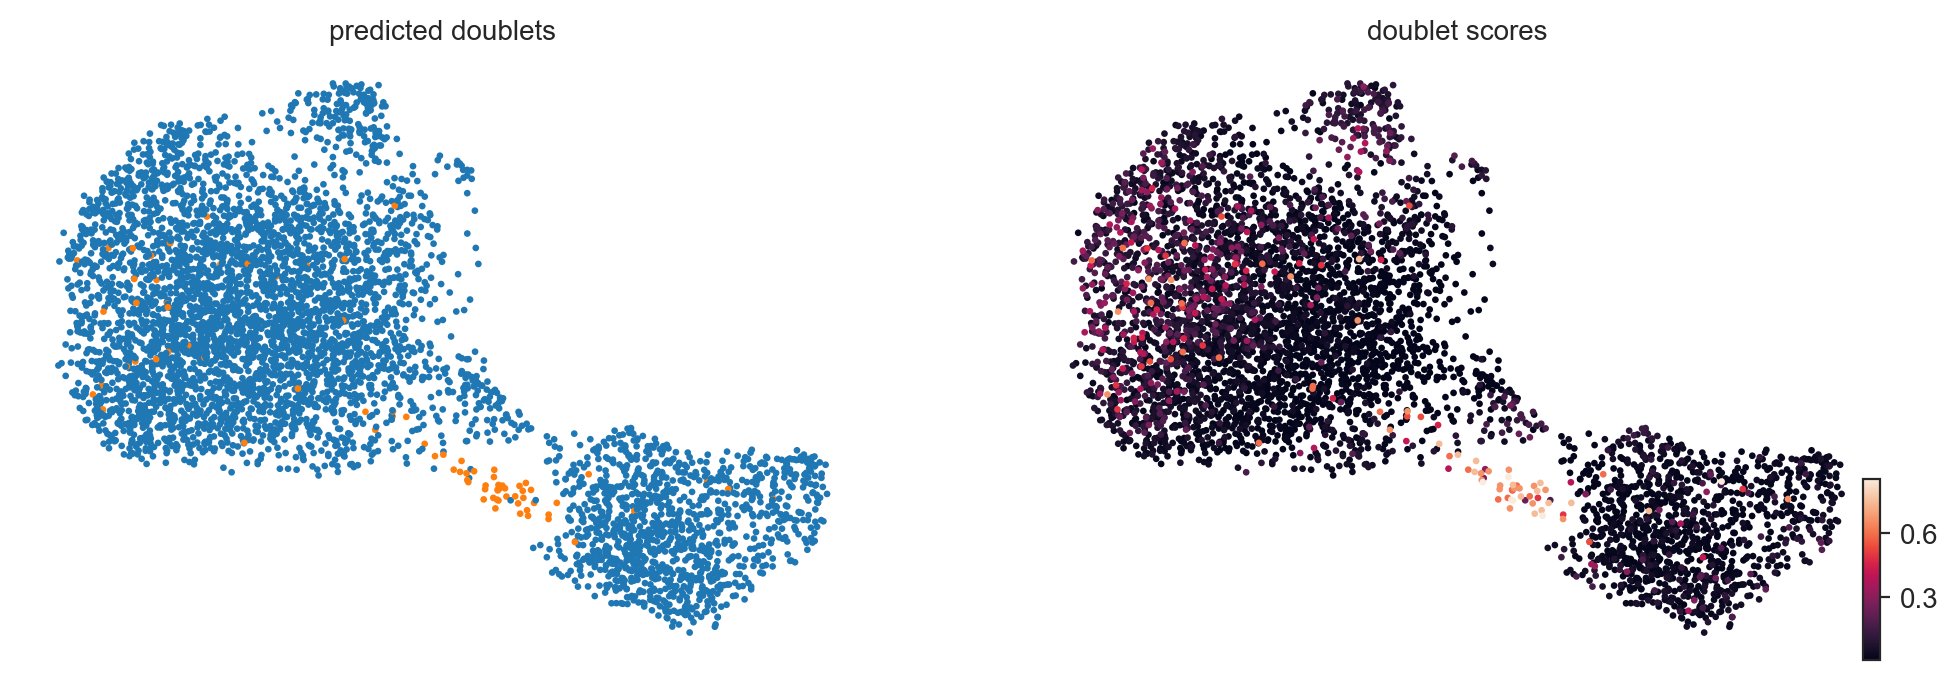

In [7]:
scv.pl.umap(adata, color = ['predicted_doublets','doublet_scores'], save = 'doublets.png', dpi = 200)

In [8]:
print((adata.obs.predicted_doublets == 'True').sum())
print(adata.shape[0])

82
5165


We are not going to remove these doublets since they were not removed in Ireland et al. so we stay consistent with those analyses. However, we will keep the prediction as an attribute so we ensure that archetypes are not enriched for doublets later.

In [9]:
adata.write_h5ad('../data/M2/adata_01.h5ad')

## EMT Signature

In [11]:
emt = pd.read_csv('/Users/smgroves/Documents/GitHub/Groves-CellSys2021/data/single-cell-rna-seq/Lung EMT signature.csv', header = 0, index_col = 0)


In [12]:
sc.tl.score_genes(adata, gene_list=[i.capitalize() for i in emt.loc[emt['Group']=='M'].index], score_name='M')
sc.tl.score_genes(adata, gene_list=[i.capitalize() for i in emt.loc[emt['Group']=='E'].index], score_name='E')

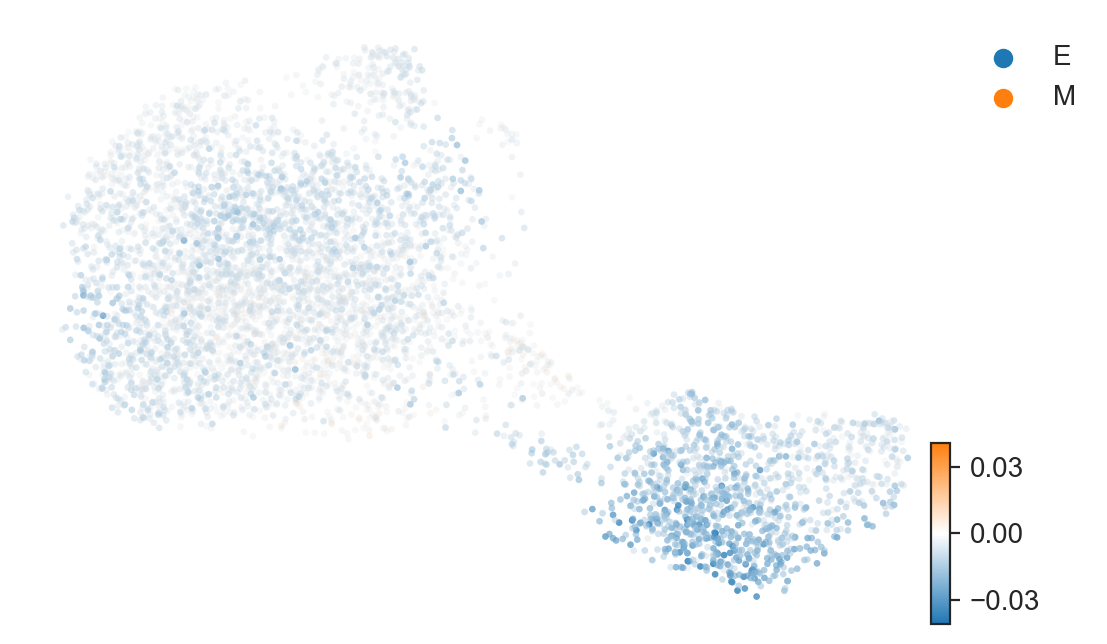

In [13]:
scv.pl.umap(adata, color_gradients=['E','M'], smooth = True, perc = [5,95], dpi = 200, colorbar = True)


## Cell cycle regression 

In [14]:

s_genes_list = \
    ['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung', 'Gins2',
     'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Mlf1ip', 'Hells', 'Rfc2',
     'Rpa2', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76', 'Slbp', 'Ccne2', 'Ubr7',
     'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2', 'Cdc45', 'Cdc6', 'Exo1', 'Tipin',
     'Dscc1', 'Blm', 'Casp8ap2', 'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Brip1', 'E2f8']

g2m_genes_list = \
    ['Hmgb2', 'Cdk1', 'Nusap1', 'Ube2c', 'Birc5', 'Tpx2', 'Top2a', 'Ndc80',
     'Cks2', 'Nuf2', 'Cks1b', 'Mki67', 'Tmpo', 'Cenpf', 'Tacc3', 'Fam64a',
     'Smc4', 'Ccnb2', 'Ckap2l', 'Ckap2', 'Aurkb', 'Bub1', 'Kif11', 'Anp32e',
     'Tubb4b', 'Gtse1', 'Kif20b', 'Hjurp', 'Cdca3', 'Hn1', 'Cdc20', 'Ttk',
     'Cdc25c', 'Kif2c', 'Rangap1', 'Ncapd2', 'Dlgap5', 'Cdca2', 'Cdca8',
     'Ect2', 'Kif23', 'Hmmr', 'Aurka', 'Psrc1', 'Anln', 'Lbr', 'Ckap5',
     'Cenpe', 'Ctcf', 'Nek2', 'G2e3', 'Gas2l3', 'Cbx5', 'Cenpa']

ctrl_size = min(len(s_genes_list), len(g2m_genes_list))

sc.tl.score_genes(adata, gene_list=s_genes_list, score_name="S_score", ctrl_size = ctrl_size)
sc.tl.score_genes(adata, gene_list=g2m_genes_list, score_name="G2M_score", ctrl_size = ctrl_size)
scores = adata.obs[["S_score", "G2M_score"]]

phase = pd.Series("S", index=scores.index)  # default phase is S
phase[scores.G2M_score > scores.S_score] = "G2M"  # G2M, if G2M is higher than S
phase[np.all(scores < 0, axis=1)] = "G1"  # G1, if all scores are negative

adata.obs["phase"] = phase


saving figure to file ./figures/scvelo_cc.png


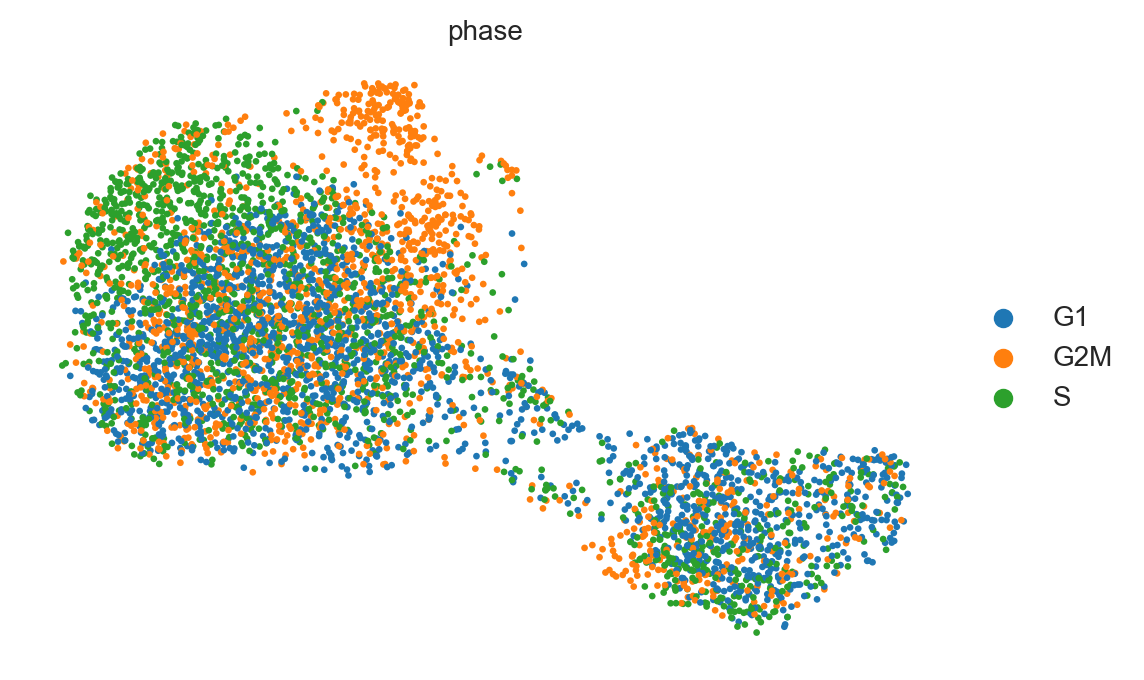

In [16]:
scv.pl.umap(adata, color=['phase'],legend_loc = 'on right', save = 'cc.png', dpi = 200)

In [17]:
adata.obs["cell_cycle_diff"] = adata.obs["S_score"] - adata.obs["G2M_score"]


saving figure to file ./figures/scvelo_cc_diff.png


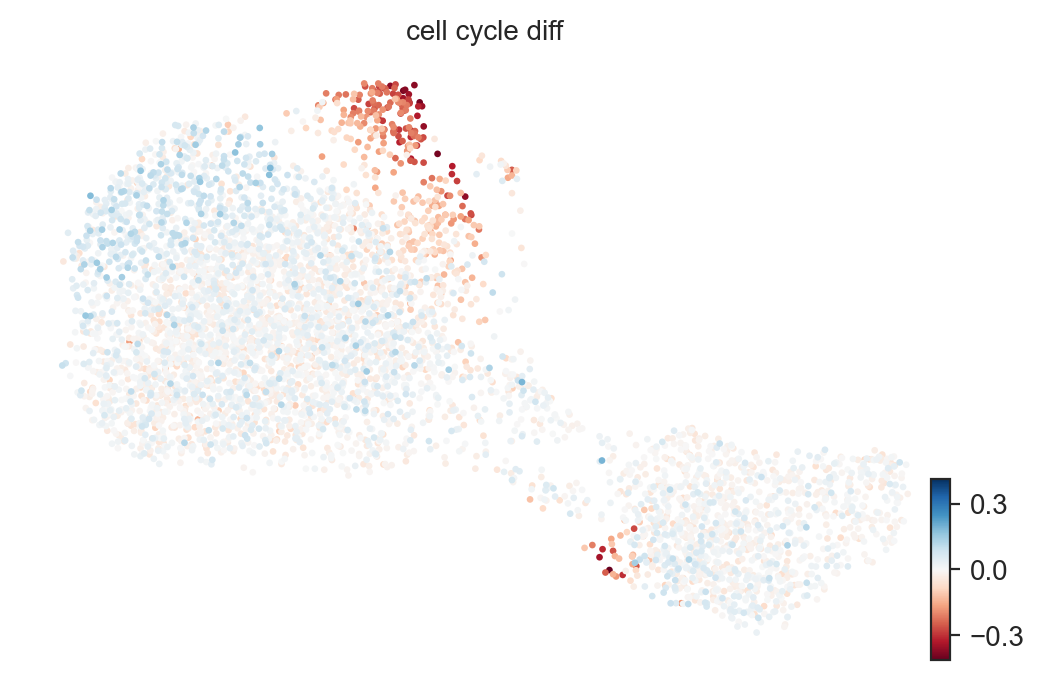

In [18]:
from matplotlib.colors import CenteredNorm 
scv.pl.umap(adata, color=['cell_cycle_diff'], cmap = 'RdBu', norm=CenteredNorm(0), save = 'cc_diff.png', dpi = 200)

In [50]:
# adata_cc = sc.pp.regress_out(adata, keys='cell_cycle_diff', copy=True)
# sc.pp.scale(adata_cc)

In [51]:
# sc.tl.pca(adata_cc, n_comps=50, use_highly_variable=False)
# scv.pp.neighbors(adata_cc, random_state=0)
# scv.tl.umap(adata_cc, random_state=0)

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [2]:
# adata_cc = sc.read_h5ad('../../out/RPM-time-series/adata_cc_01.h5ad')

In [19]:
# from matplotlib.colors import CenteredNorm 

# scv.pl.umap(adata_cc, color=['timepoint','cell_cycle_diff','phase'], legend_loc = 'on right',cmap = 'RdBu', norm=CenteredNorm(0),save = 'cc_diff_corrected.png', dpi = 200)

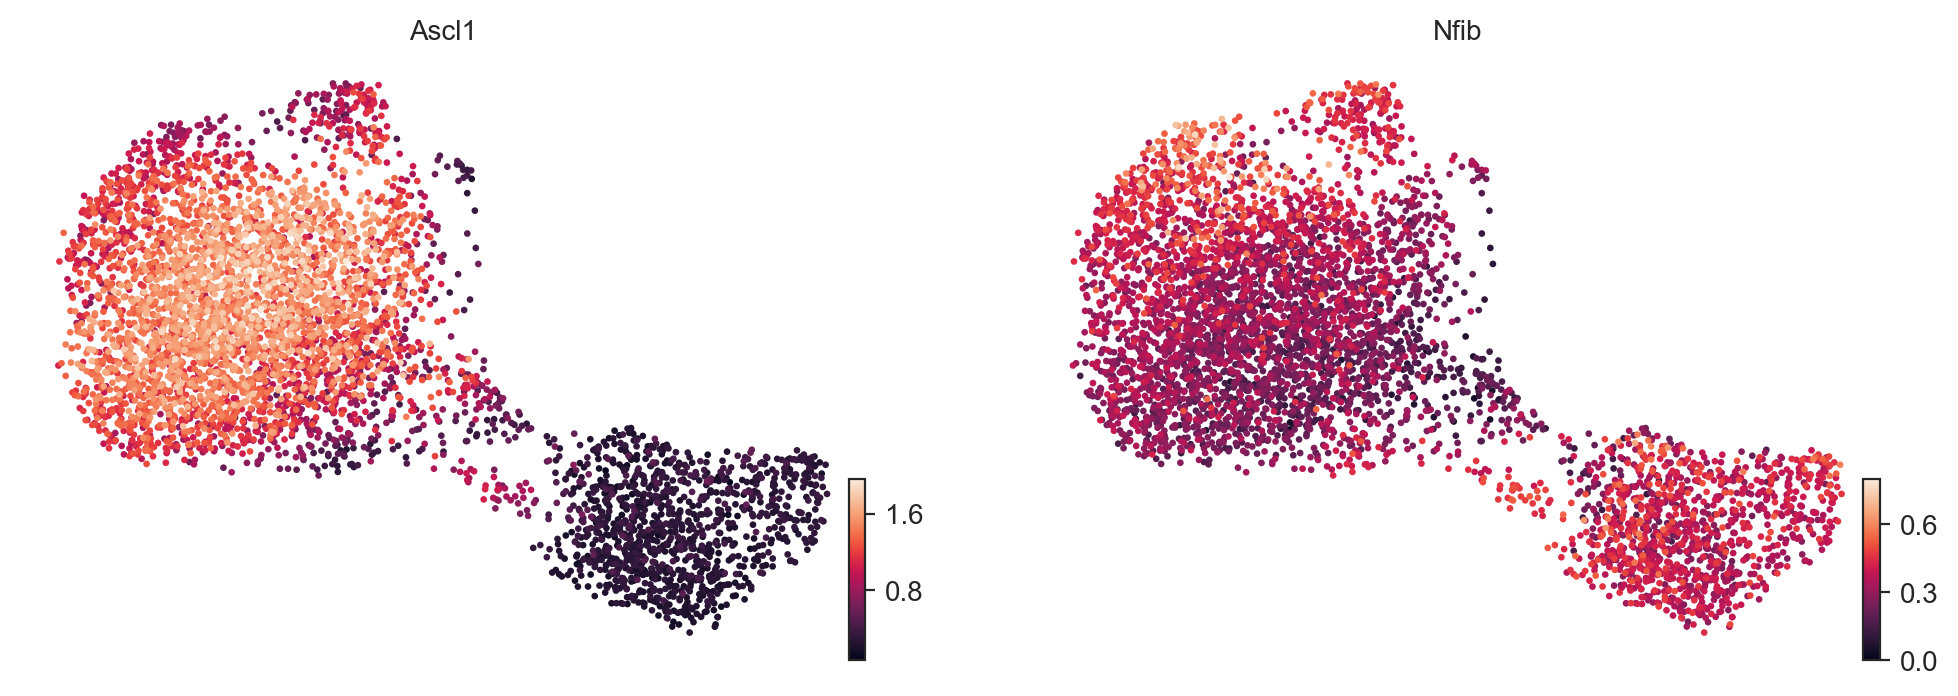

In [24]:
scv.pl.umap(adata, color=['Ascl1','Nfib'], smooth = True, dpi = 200)

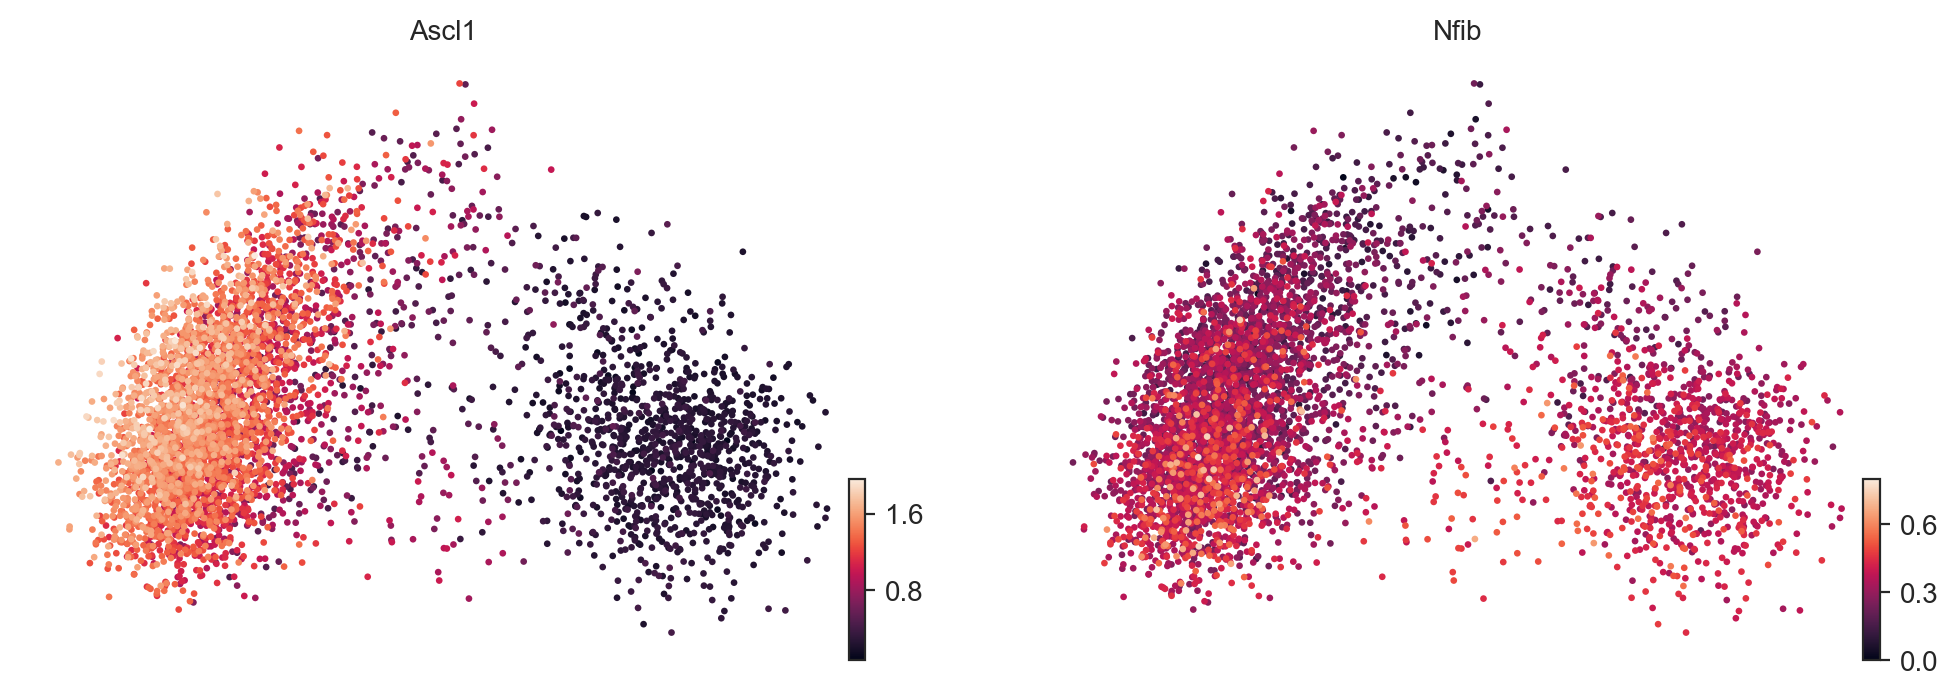

In [25]:
scv.pl.pca(adata, color=['Ascl1','Nfib'], smooth = True, dpi = 200)

## Dropkick labels

In [32]:
import dropkick as dk
adata_dk = dk.recipe_dropkick(adata, n_hvgs=None, X_final="raw_counts", )


Ignoring 36 genes with zero total counts
Top 10 ambient genes have dropout rates between 0.0 and 28.228 percent:
	['Gm42418', 'Malat1', 'Scgb1a1', 'Gm26917', 'AY036118', 'Xist', 'Ddx5', 'Srrm2', 'Ascl1', 'Neat1']


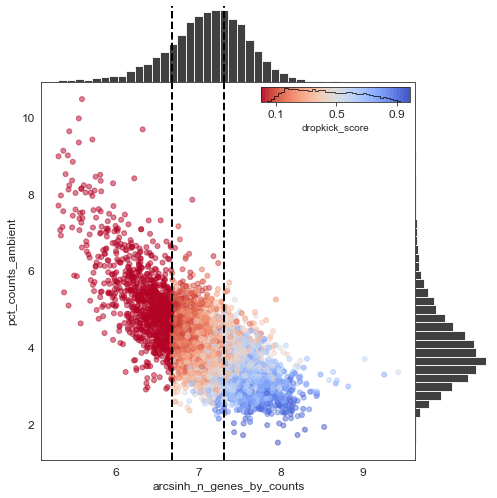

In [33]:
score_plt = dk.score_plot(adata_dk)


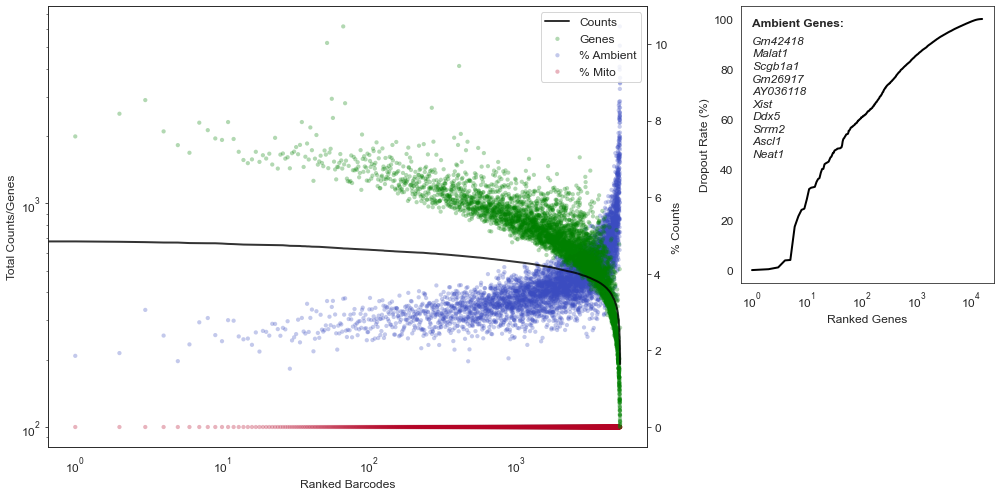

In [34]:
qc_plt = dk.qc_summary(adata_dk)


In [35]:
adata

AnnData object with n_obs × n_vars = 5165 × 15728
    obs: 'doublet_scores', 'predicted_doublets', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'dropkick_coef', 'mito', 'pct_dropout_by_counts', 'ambient'
    uns: 'pca', 'neighbors', 'umap', 'predicted_doublets_colors', 'clusters_gradients_colors', 'phase_colors', 'dropkick_thresholds', 'dropkick_args'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'raw_counts'
    obsp: 'distances', 'connectivities'

## Saving

Because we filtered out the dropkick cells after filtering cells and genes with scanpy, we need to doublecheck that all of the genes are actually expressed in the dataset, so we'll do a small filter to get rid of any genes we missed.

In [36]:
adata.write_h5ad('../data/M2/adata_01.h5ad')

In [71]:
sc.pp.filter_genes(adata, min_cells=3)

In [37]:
adata

AnnData object with n_obs × n_vars = 5165 × 15728
    obs: 'doublet_scores', 'predicted_doublets', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'dropkick_coef', 'mito', 'pct_dropout_by_counts', 'ambient'
    uns: 'pca', 'neighbors', 'umap', 'predicted_doublets_colors', 'clusters_gradients_colors', 'phase_colors', 'dropkick_thresholds', 'dropkick_args'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'raw_counts'
    obsp: 'distances', 'connectivities'